## Data Pre Processing


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', None)

dataset=pd.read_csv('Mall_Customers.csv')

X=dataset.iloc[:,[3,4]].values

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
X

### Using the Elbow Method to find the optimal no of clusters

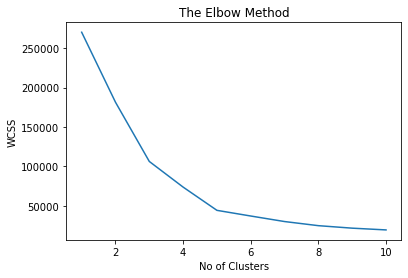

In [2]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

### Applying KMeans to the Mall Dataset

In [3]:
kmeans=KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300, random_state=0)


### Here we will be using the FIT PREDICT method that returns "for each observation which clusters it belongs to"

In [4]:
Y_KMeans=kmeans.fit_predict(X)
Y_KMeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

### Visualizing the clusters

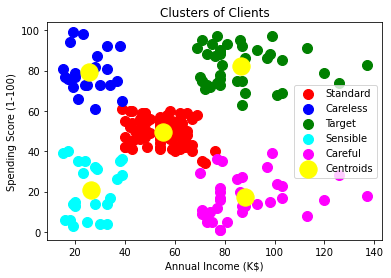

In [5]:
plt.scatter(X[Y_KMeans==0, 0], X[Y_KMeans==0, 1], s=100, c="red", label="Standard")
plt.scatter(X[Y_KMeans==1, 0], X[Y_KMeans==1, 1], s=100, c="blue", label="Careless")
plt.scatter(X[Y_KMeans==2, 0], X[Y_KMeans==2, 1], s=100, c="green", label="Target")
plt.scatter(X[Y_KMeans==3, 0], X[Y_KMeans==3, 1], s=100, c="cyan", label="Sensible")
plt.scatter(X[Y_KMeans==4, 0], X[Y_KMeans==4, 1], s=100, c="magenta", label="Careful")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="Centroids")
plt.title("Clusters of Clients")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()